# <p style="text-align:center"> <span style="color:blue">[WMCS011-05] Pattern Recognition (for CS) 2024-2025 </span></p>

## <p style="text-align:center"> 1st practical: Iris recognition \& Image matching using SIFT</p>

### $$ \text{Group 6} $$
### $$ \text{Marthe Elsjan}  \quad \& \quad \text{Marloes van Asselt}  $$

## **Information and instructions**
*   <span style="color:red">**DEADLINE**</span>  Tuesday 3 December 2024 **before** 23:59PM. Hand in this file *containing your code and answers added* through Brightspace.
*   This is a group assignment (should be done in pairs).
*  Insert a Markdown cell (where needed) and add the formulas you used to answer a question, as well as a short description of how you came up with your solution.
*   Some exercises ask you to find a specific value or expression or ask you for an interpretation. Insert a Markdown cell and provide your answers briefly.
* Make sure to include all the necessary print statements and remove the extra ones that were only used for testing your implementation.
*   Please ensure that all your figures are properly labeled with title, axis labels, and legend if you plot multiple curves in one graph.
*   Structure your code using comments and separate code cells where necessary, and be sure to indicate which part of your code belongs to which question.
*   To test your code, we will run all your code cells from scratch - so make sure all results can be reproduced!
* For any questions, you can contact us at [patternrecognition.cs.rug@gmail.com](patternrecognition.cs.rug@gmail.com).

## Table of Contents
* [Exercise 1 - Person authentication by binary iris pattern (50pt)](#chapter1)
    * [Part 1 - Distribution of authentics and imposters](#section_1_1)
    * [Part 2 - Person authentication](#section_1_2)
* [Exercise 2 - Image matching using SIFT (50 pt)](#chapter2)
* [Contributions](#chapter3)

In [2]:
# Import libraries
import numpy as np
from matplotlib.pyplot import figure, show
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
import pandas as pd
from pathlib import Path
from numpy.random import randint,choice
import scipy.io as sio
from scipy.stats import norm
import cv2 as cv

# <span style="color:blue">Exercise 1 - Person authentication by binary iris pattern (50pt)  <a class="anchor" id="chapter1"></a></span>


On Brightspace, you will find the file **lab1-data_Irisrecognition.zip**, which contains the iris codes of different persons. The file named $\textit{person01.mat}$ to $ \textit{person20.mat}$ contains a two-dimensional binary array of 20 rows, in which each row is a 30-dimensional binary iris code extracted from an iris image of a person. If you take a closer look at the rows of one such array, you will notice that two rows can differ in only a few positions (bits); If you compare two rows that come from two different files $person[i]$ and $ person[j]$, you will notice that two such iris codes differ in about 15 positions.

## Part 1 - Distribution of authentics and imposters (20pt) <a class="anchor" id="section_1_1"></a></span>


Compute two sets S and D of 10000 normalized Hamming Distance (HD) as follows:

<ol>
<li> <b> For set S: </b> Choose randomly one person and randomly two iris codes (rows) from that person. Compute the normalized HD of the iris codes from these two rows. Repeat this process 10000 times to obtain 10000 such normalized HD values. </li>
<br>

<li> <b>For set D: </b> Choose randomly two different persons and randomly one row from each of these two persons. Compute the normalized HD of these two iris codes from these two different persons. Repeat this process 10000 times to obtain 10000 such normalized HD values. </li>

</ol>

<span style="color:blue"> **(10 pt) (A)** </span> **Plot the histograms of Set S and D in one figure with different colors. Make sure to use bins of the same size for the two histograms and to use an appropriate number of bins.**

<hr>

The normalised Hamming Distance can be defined by $$H(I_t,I_p)= \frac{|I_t \oplus I_p| }{|I|}$$

In order to find the distribution for the set S we first first randomly chose a person (index between 0-19) and then chose two of their iris codes. Here we make sure to chose two unique rows. This was done by generating a list of indices (0-19, representing the 20 iris codes each person has) and then using the choice function, making sure to set "replace=False". This function acts similar to the .sample() for pandas, it choses two random samples from our array and replace=False ensures that there are no duplicates. We then calculate the normalised hamming distance between these two codes and append the result to our list.

For set D we follow a similar process except we use the choice function when generating the random choices of people, that way we ensure that we are comparing two unique persons. We then randomly chose one of the iris codes of each person (using different randomly generated integers to ensure we do not introduce a bias by comparing the same iris code of the two people). Again, we compute the normalised hamming distance and append this to our set D. 

In [3]:
#Get list of filepaths for persons
file_paths= sorted(list(Path('lab1-data_Irisrecognition').glob("person*")))

#Store names
names=[file.stem for file in file_paths]

#Open all files
dict_files={}  #Store values in a dictonary
for file in file_paths:
  name= file.stem #name in dict will be "personXX"
  mat_contents = sio.loadmat(file)
  dict_files[name]= mat_contents['iriscode'] #Only store iris code

print(dict_files.keys())

dict_keys(['person01', 'person02', 'person03', 'person04', 'person05', 'person06', 'person07', 'person08', 'person09', 'person10', 'person11', 'person12', 'person13', 'person14', 'person15', 'person16', 'person17', 'person18', 'person19', 'person20'])


In [4]:
def HD_norm(a1,a2,masked=False):
  """Get the normalised Hamming distance between two iris codes (a1 & a2)
  Length can be changed to account for masked arrays"""
  length=len(a1)
  if masked:
    length= a1.count()
  HD= (a1 ^ a2).sum()/length #Calculate normalised HD
  return HD


In [5]:
# Compute Set S...
set_S=[]

#get 10000 random integers
random_persons= randint(0,20,10000)

for i in random_persons:
  name= names[i]
  iris_code= dict_files[name]
  #Generate two unique rows using indexing and the sample function
  indices= np.arange(0,iris_code.shape[0],1)
  rows= choice(indices,2,replace=False)
  #Append normalised HD
  set_S.append(HD_norm(iris_code[rows[0],:],iris_code[rows[1],:]))

In [6]:
# Compute set D...
set_D=[]

ints=[]
#get pairs of unique integers
for x in range(10000):
  indices= np.arange(0,20,1)
  rows= choice(indices,2,replace=False)
  ints.append(rows)

for a1,a2 in ints:
  name1= names[a1]
  name2= names[a2]
  iris_code1= dict_files[name1]
  iris_code2= dict_files[name2]

  random_row= randint(0,iris_code1.shape[0],2)
  set_D.append(HD_norm(iris_code1[random_row[0],:],iris_code2[random_row[1],:]))


In order to decide the appropriate bins for the histogram we consider that each bit is a degree of freedom in the iris code, so in this case $n=|I|=30$. The amount of values the HD can take on is $n+1=31$ and since we normalise the HD, these values will be between 0 and 1 and will be evenly distributed. Thus we take 31 bins, evenly distributed over a range [0,1]

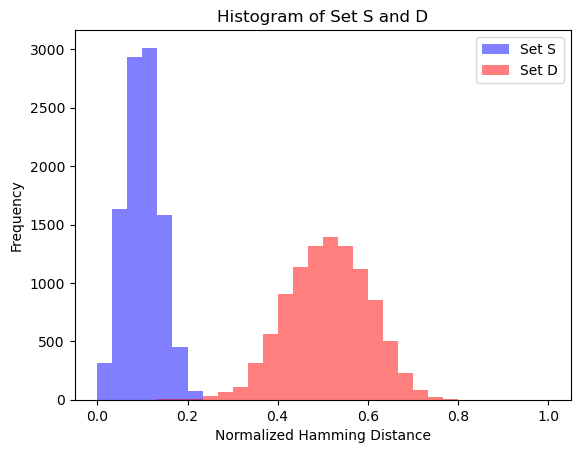

In [7]:
# Plot histograms of Set S and D...
bins=np.linspace(0,1,31)
fig = figure()
ax = fig.subplots()
ax.hist(set_S, bins=bins, alpha=0.5,color='b', label='Set S')
ax.hist(set_D, bins=bins, alpha=0.5,color='r', label='Set D')
ax.set_xlabel('Normalized Hamming Distance')
ax.set_ylabel('Frequency')
ax.set_title('Histogram of Set S and D')
ax.legend()
show()


We see a clear separation between the two histograms. As expected, Set S, where we compare iris codes of the same person, has a lower mean hamming distance than set D, where we compare iris codes of different people. We also see that set S has a narrower distribution than set D.


<span style="color:blue">  **(5 pt) (B)** </span> **Compute the mean and the variance of the set S and D and specify their values.**

<hr>

In [8]:
# Compute mean and variance...

mu_setS = np.mean(set_S)
mu_setD = np.mean(set_D)
var_setS = np.var(set_S)
var_setD = np.var(set_D)

# print(mu_setS, mu_setD, var_setS, var_setD)
print(f"Set S had a mean of {mu_setS:.3f} and variance of {var_setS:.3f}")
print(f"Set D had a mean of {mu_setD:.3f} and variance of {var_setD:.3f}")

Set S had a mean of 0.085 and variance of 0.002
Set D had a mean of 0.494 and variance of 0.008


<span style="color:blue">  **(5 pt) (C)** </span> **Draw the normal distributions (Gaussian functions), that correspond to the means and variances calculated above, to the histograms of Set S and D. Find an appropriate way to scale the normal distribution curves so that they fit well the histograms.**

<hr>

$f(x) = \frac{1}{\sqrt{2\pi \sigma^2}}e^{-\frac{(x-\mu)^2 }{ 2\sigma^2}}$

where $var = \sigma^2$

Gaussian distributions are normalised to have an area of 1. The common practice to fit a Gaussian to the data is to normalise the data distribution to also have an area of 1. The most straight forward way to do this is to set density=True in the histogram function.

Alternatively, we can also scale the gaussian to our data by the area of our histogram. Each set has 10 000 data points, whose $dy*dx$ (aka, the area) is $1* \frac{1}{31}$, so we scale the gaussians by $N*[\text{area per point}]=\frac{10000}{31}$

Both options are shown below. However, since we are working with statistical distributions it is common practice to set the total probability to 1 (So CDF($\infty$)=1). Thus we chose to not scale our gaussians but to work with unscaled gaussian in the rest of the assignment and instead scale our data distribution, whenever necessary.

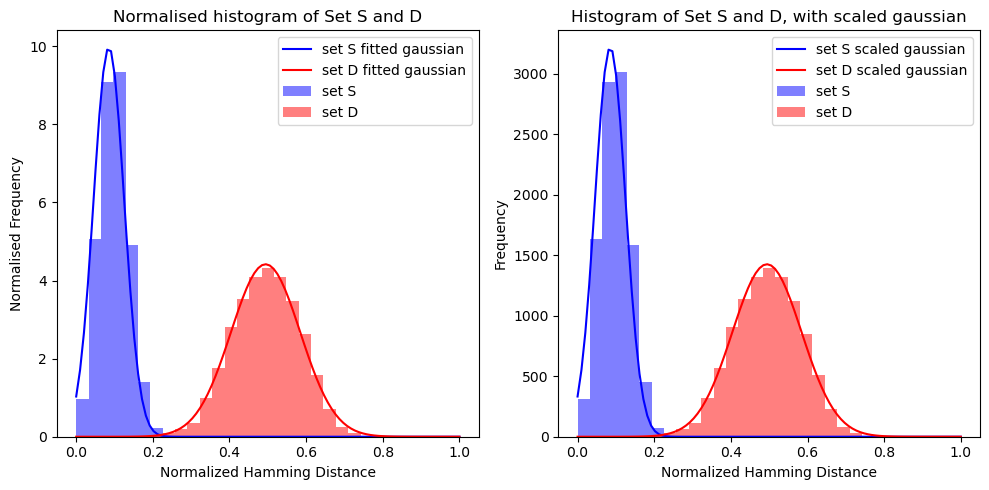

In [30]:
# Plot the distributions...

def gauss(x,mu,var):
    return (1/np.sqrt(2*np.pi*var))*np.exp(-((x-mu)**2)/(2*var))

def gauss_scaled(x,mu,var, N=10000):
    return (N/31)*(1/np.sqrt(2*np.pi*var))*np.exp(-((x-mu)**2)/(2*var))

xrange = np.linspace(0, 1, 100)

fig = plt.figure(figsize=(10,5))
ax=fig.subplots(1,2)

ax[0].plot(xrange, gauss(xrange, mu=mu_setS, var=var_setS),c='b', label='set S fitted gaussian')
ax[0].plot(xrange, gauss(xrange, mu=mu_setD, var=var_setD),c='r', label='set D fitted gaussian')

ax[0].hist(set_S, bins=31, range=(0,1), label='set S',alpha=0.5,color='b', density=True)
ax[0].hist(set_D, bins=31, range=(0,1), label='set D',alpha=0.5,color='r', density=True)

ax[0].set_title('Normalised histogram of Set S and D')
ax[0].set_ylabel('Normalised Frequency')
ax[0].set_xlabel('Normalized Hamming Distance')

ax[0].legend()

ax[1].plot(xrange, gauss_scaled(xrange, mu=mu_setS, var=var_setS),c='b', label='set S scaled gaussian')
ax[1].plot(xrange, gauss_scaled(xrange, mu=mu_setD, var=var_setD),c='r', label='set D scaled gaussian')

ax[1].hist(set_S, bins=31, range=(0,1), label='set S',alpha=0.5,color='b'), #density=True)
ax[1].hist(set_D, bins=31, range=(0,1), label='set D',alpha=0.5,color='r',)# density=True)

ax[1].set_title('Histogram of Set S and D, with scaled gaussian')
ax[1].set_ylabel('Frequency')
ax[1].set_xlabel('Normalized Hamming Distance')

ax[1].legend()
fig.tight_layout()
plt.show()


We see that the curves fit our data sets fairly well. The peak of set S seems to be slighly shifted but this likely due to the binning. Since we are working with discrete values, our hamming distance will also only take certain values, however, the mean of our distribution does not have to be discrete, hence there might seem to be a slight shift in the peak. The spread/variance of the gaussian distributions also fit the data well.

## Part 2 - Person authentication (30pt) <a class="anchor" id="section_1_2"></a></span>


The distribution associated with the set S is the class-conditional probability density function that we measure a given HD value for two iris codes of the same person. The distribution associated with the set D is the class-conditional probability density function that we measure a given HD value for two iris codes of two different persons.

Our Null-hypothesis $\textit{H0}$ is that two iris patterns are different. We choose a value
for the decision criterion $\textit{d}$ and compare the HD of two iris patterns to d. If $ \textit{HD > d}$, we consider this as confirmation of our assumption that the two iris codes are different; If $\textit{HD < d}$, we consider our assumption that the two iris codes are different is not confirmed, i.e., implicitly we accept that they come from the same person.

<span style="color:blue">  **(5 pt) (A)** </span> **Estimate the value of the decision criterion d for which the probability of accepting an imposter is 0.0005. This situation will occur when the HD between the iris codes of two different persons is smaller than the decision criterion d. You can use the python function $scipy.stats.norm.ppf$ to find such decision criterion.**

<hr>

If we take the ppf function at 0.0005, centered and scaled to the mean and variance of set D, it will return a value d such that $P(HD_{SetD}<d)=0.0005$. This means that the chance to accept an imposter is less than 0.05%

In [11]:
# Estimate the decision criterion d...

d = norm.ppf(0.0005, loc=mu_setD, scale=np.sqrt(var_setD))

print(f"Decision criterion for P(False Positive)<=0.0005 is {d:.4f}")

Decision criterion for P(False Positive)<=0.0005 is 0.1970


<span style="color:blue">  **(5 pt) (B)** </span> **For the value of the decision criterion calculated above, determine the probability of rejecting an authentic person. For this purpose, use a normal distribution to model Set S and find the value of the integral in the tail of this distribution for values HD > d. You can use the python function $scipy.stats.norm.cdf$ to compute such a probability.**

<hr>

The Cumulative Distribution Function (CDF(x)) gives us the portion of values that lie to the left of x. The way we use the decision criterion is that we define anything to the left as "same" and anything to the right as "different". This means that $CDF_{Set S}(d)$ gives the potion of True Positives. If we want to find the portion of False Negatives we have to take 1-$CDF_{Set S}(d)$ 

In [12]:
# Determine the probability of...

RA = 1 - norm.cdf(d, loc=mu_setS, scale=np.sqrt(var_setS))

print(f"for d={d:.4f} gives P(False Negative)={RA:.4f}")

for d=0.1970 gives P(False Negative)=0.0026


Thus the chance to have an incorrect reject is less than $0.3\%$

<span style="color:blue">  **(15 pt) (C)** </span> **Consider the iris code given in the file $\textit{testperson.mat}$. This file contains an iris code with some missing bits. These missing bits have the value 2 instead of 0 or 1. To which of the 20 persons whose iris codes are stored in files $person01.mat$ to $person20.mat$ does this iris code most likely belong to?**

<hr>

We can evaluate this in two ways.

The first method we will use is similar to what we did for Set S and Set D in part 1. Since we can compare the test iris code with 20 iris codes for each person, we can start to approximate the gaussian distributions of Set S and and Set D, whichever person seems to fit best with Set S, is likely the person to which the code belongs. 

The second method is the way with the Null-Hypothesis. Here we assume first that the two iris codes that are being compared are of different people. We then compute the normalised HD and if HD>d (where $d=0.1970$, the desicion criterion that we found earlier), we accept the null hypothesis. Otherwise, if ($HD<d$), we accept $H_a$: "the two iris code belong to the same person". We keep count of how many times each person passed $H_a$ $(HD<d)$, and then assume the person with the highest number is the correct match.

In both cases we first need to account for the missing bits. In order to do this, we create a mask on all places where the bits take a value of 2. We then apply this mask on the test person code and on the code with which we are comparing. We also must take the mask into account when normalising our HD. In order to compute the amount of non-masked bits we use the function $.count()$, which returns the amount of non-masked elements.

In [ ]:
#Load iris code
file_path=Path("lab1-data_Irisrecognition/testperson.mat")
mat_contents = sio.loadmat(file_path)
testperson_code= mat_contents['iriscode']

#Create mask
test_mask = np.zeros(np.shape(testperson_code))
#Check where mask is needed
inx= np.where((testperson_code==2))[1]
#Change mask =1 for found indices
test_mask[0,inx]=1
masked_testcode= np.ma.masked_array(testperson_code,mask=test_mask)

#Create list to store HD
HD_comp=np.zeros([20,20])   #Store each HD per iris code, per person
H1_pass= np.zeros(20) #Store the amount of times each person passes Ha hypothesis (HD<d)

for i,name in enumerate(names):
    iris_code= dict_files[name]
    for j in range(20):
        #Apply mask
        masked_person= np.ma.masked_array(iris_code[j,:],mask=test_mask)
        HD= HD_norm(masked_person,masked_testcode,masked=True)
        HD_comp[i,j]=HD
        if HD<d:
            H1_pass[i]+=1 #Add pass count if person passes the decision criterion
    

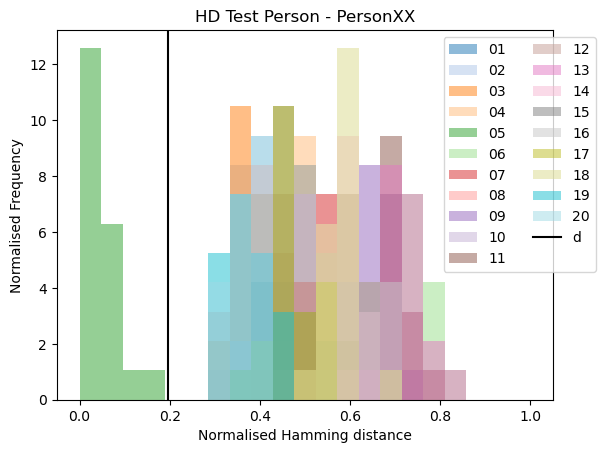

In [43]:
color= cm.tab20(range(20))

fig = plt.figure()

ax= fig.subplots()
for i in range(20):
    ax.hist(HD_comp[i,:], bins=(masked_testcode.count()+1),color=color[i], range=(0,1), label=names[i][-2:], alpha=0.5,density=True)
ax.axvline(d,label="d", color='black')
ax.legend(loc="upper right",ncol=2,bbox_to_anchor=(1.1,1))

ax.set_title("HD Test Person - PersonXX")
ax.set_ylabel("Normalised Frequency")
ax.set_xlabel("Normalised Hamming distance")

show()

In [15]:
print("Amount of times each person has a HD<d match with test person")
for i in range(20):
    print(f'| {names[i]} | {int(H1_pass[i]):2} |')

Amount of times each person has a HD<d match with test person
| person01 |  0 |
| person02 |  0 |
| person03 |  0 |
| person04 |  0 |
| person05 | 20 |
| person06 |  0 |
| person07 |  0 |
| person08 |  0 |
| person09 |  0 |
| person10 |  0 |
| person11 |  0 |
| person12 |  0 |
| person13 |  0 |
| person14 |  0 |
| person15 |  0 |
| person16 |  0 |
| person17 |  0 |
| person18 |  0 |
| person19 |  0 |
| person20 |  0 |


The histograms in the figure above show that the distribution of the HDs of the iris code of person 5 falls fully under our decision criterion. Additionally, the table of the counts for $HD<d$ also shows that person 5 passes this criterion the most often. Hence, person 5 is our most likely fit and we state our null hypothesis and alternative hypothesis as:

$H_0$: The iris from person 5 and test person are different

$H_a$: The iris from person 5 and test person are the same

<span style="color:blue"> **(5 pt) (D)** </span> **What is the significance level of your decision? $Hint:$ Excluding the bits with a value of 2, denote by HDt the normalized Hamming distance between the iris code of the test person and the iris code of the person that you identified in the data set. The significance level which corresponds to HDt is defined as the probability that the comparison of the iris code of the test person with the iris code of a different person will result in a HD such that HD ≤ HDt, i.e., the concerned significance level is equal to the integral of the tail of the distribution for HD ≤ HDt. To compute its value, make use of the theoretical expression for the parameters of the normal distribution of the normalized iris code HD for the given number of available (i.e., non-missing) bits.**


<hr>

In question 1.1.c we computed the normal distribution of Set S as $\mathcal{N}(0.085,0.002)$ and for Set D as $\mathcal{N}(0.495,0.008)$. If we want to compute the significance level of the decision we make, we can compare the normalised hamming distance of the test person:person 5 with Set D. The CDF function of Set D will essentially give us the probability that person 5 is an incorrect match (aka the probability that $H_0$ holds). Since we have 20 iris codes for person 5 we compute the significance level in two manners. 

Firstly, we take the average HD over all 20 iris codes, since this is the most representative values. This is because the HD distributions tend to normal distributions for large sample sizes, which means that the mean is most likely value that the HD will take.

Secondly, we take the maximum value of the HDs of person 5. This is not the most representative way to chose a HD value since it is possible to have outliers. However, the plot in question 1.2.c shows that this is not the case and if the largest HD value gives us a good significance level that will show that we have a robust match.


In [16]:

#so we can compare to the gaussian distribution of the complete (non-missing bits) set

AA = 1-norm.cdf(HD_med[4], loc=mu_setS, scale=np.sqrt(var_setS))

AI = norm.cdf(HD_med[4], loc=mu_setD, scale=np.sqrt(var_setD))
AI_max= norm.cdf(np.max(HD_comp[4,:]), loc=mu_setD, scale=np.sqrt(var_setD))

print(f"Chance of person05 being incorrect match based on mean HD is {AI*100} %\n")
print(f"Chance of person05 being incorrect match based on max HD is {AI_max*100} %\n")

Chance of person05 being incorrect match based on mean HD is 1.1866569545111937e-05 %

Chance of person05 being incorrect match based on max HD is 0.006920803224788581 %



We see that for both computations the chance of $H_0$ holding is at most ~0.005%. Hence we can accept $H_a$: "The iris from person 5 and test person are the same" with >99% confidence.

<hr>

# <span style="color:blue">Exercise 2 - Image matching using SIFT (50pt)  <a class="anchor" id="chapter2"></a></span>

You are given two images named $a.jpg$ and $b.jpg$ that contain the same scene taken from different views. Use SIFT algorithm to identify key points in both the images and perform image matching based on the obtained descriptors.

<span style="color:blue"> **(10 pt) (A)** </span> **Describe briefly how the SIFT and SURF algorithms work.**

<hr>

## SIFT:
SIFT is a Scale Invariant Feature Transform. It uses a a Difference of Gaussians (DoG)




## SURF:
SURF is essentially a faster version of SIFT. Instead of using gaussians it uses block-like/Haar-like wavelet filters to replace the second order derivatives of the Gaussians in the Hessian matrix.



<span style="color:blue"> **(10 pt) (B)** </span>  **Display the two images and the corresponding key points identified by SIFT detector. You can use the built-in functions from $opencv$ to get and display the key points.**

<hr>

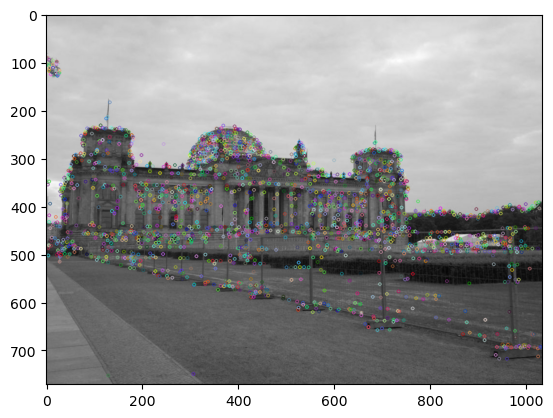

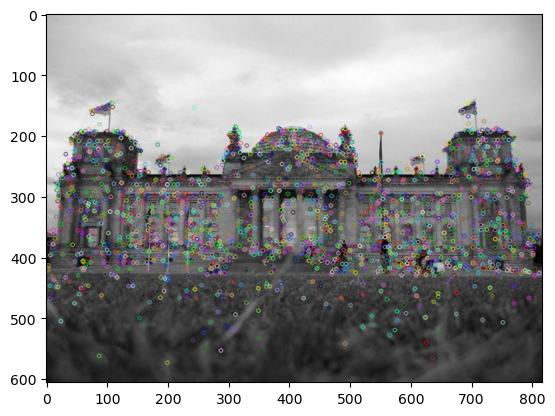

In [17]:
imgA = cv.imread("a.jpg")
imgB = cv.imread("b.jpg")
greyA = cv.cvtColor(imgA, cv.COLOR_BGR2GRAY)
greyB = cv.cvtColor(imgB, cv.COLOR_BGR2GRAY)

sift = cv.SIFT_create()

kpA, desA = sift.detectAndCompute(greyA, None)
kpB, desB = sift.detectAndCompute(greyB, None)

imgA_kp = cv.drawKeypoints(greyA, kpA, None)
imgB_kp = cv.drawKeypoints(greyB, kpB, None)

plt.figure()
plt.imshow(imgA_kp)
plt.show()

plt.figure()
plt.imshow(imgB_kp)
plt.show()

<span style="color:blue"> **(30 pt) (C)** </span> **Match the obtained descriptors in the two images and display the results that draw lines between the matched descriptors from the two images. You can use the built-in functions from $opencv$ to get and display the results for image matching.**

<hr>

(2371, 2)
(2371,)
119


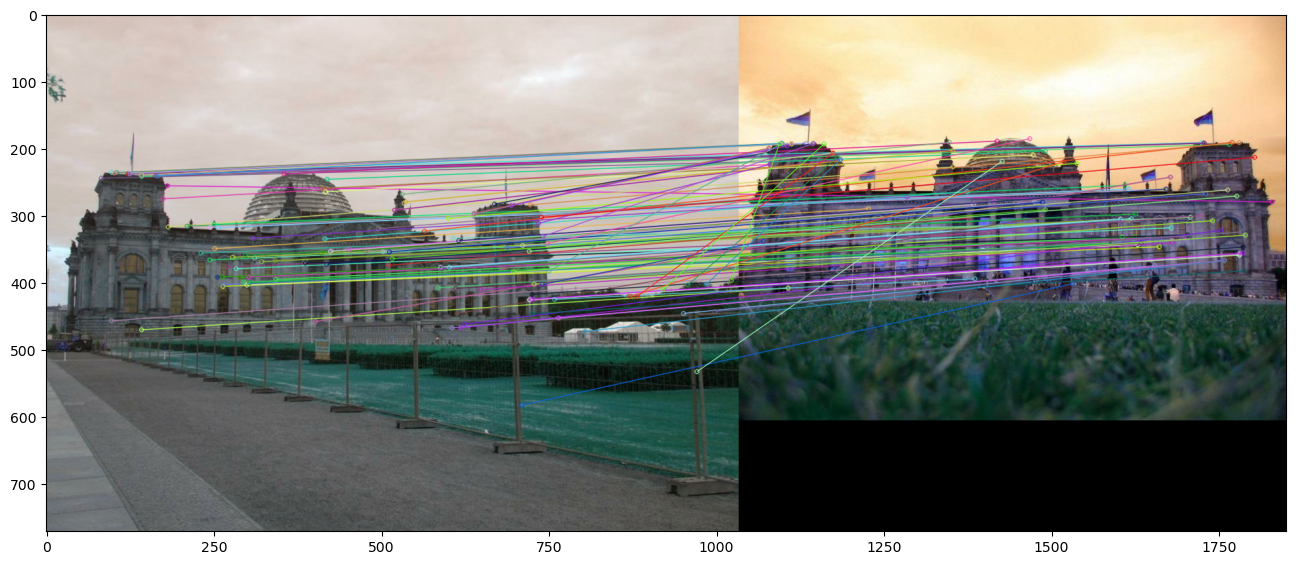

In [18]:

bf = cv.BFMatcher()
matches = bf.knnMatch(desA, desB, k=2)

good = []
# Need to draw only good matches, so create a mask
matchesMask = [[0,0] for i in range(len(matches))]

print(np.shape(matches))
print(np.shape(kpA))

for i,(m,n) in enumerate(matches):
    if m.distance < 0.75*n.distance:
        good.append([m])
        matchesMask[i]=[1,0]

print(len(good))

draw_params = dict(matchColor = (0,255,0),
                   singlePointColor = (255,0,0),
                   flags = cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
img_matched =  cv.drawMatchesKnn(imgA,kpA, imgB, kpB, good, None, flags = cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)


plt.figure(figsize=(16,9))
plt.imshow(img_matched)
plt.show()


# <span style="color:blue">Contributions<a class="anchor" id="chapter3"></a></span>

All the code was written together
Marloes wrote the explanation/theory for Exercise 1 and Marthe wrote it for Exercise 2